In [88]:
#import the necessary libraries
import numpy as np
import pandas as pd
from pandas_datareader import wb
import seaborn as sns
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.optimize import curve_fit
from numpy import arange


In [5]:
CO2_per_dallar_of_GDP = ['EN.ATM.CO2E.PP.GD.KD']
GDP_per_capita = ['NY.GDP.PCAP.CD']
CO2_production_per_head =['EN.ATM.CO2E.PC']
indicators = ['EN.ATM.CO2E.PP.GD.KD','NY.GDP.PCAP.CD','EN.ATM.CO2E.PC']
columns = ['CO2_per_dallar_of_GDP','GDP_per_capita','CO2_production_per_head']


In [6]:
#countries to be considered
countries=["USA","DEU","CHN","CAN","FRA","BRA","MEX","JPN","IND","DZA","IDN","GBR","ESP","SWE"]

In [42]:
def data_set(filename):
    data = wb.download(indicator=filename, country=countries,start = 2010, end =2022).dropna() #download the data from worldbank
    data.columns = columns
    dataset = data.reset_index()
    dataset_2 = dataset[['year','country','CO2_per_dallar_of_GDP','GDP_per_capita','CO2_production_per_head']]
    
    return dataset_2

In [43]:
data_wb = data_set(indicators)

In [44]:
data_wb.head()

,year,country,CO2_per_dallar_of_GDP,GDP_per_capita,CO2_production_per_head
0,2018,Brazil,0.139204,9151.381732,2.041874
1,2017,Brazil,0.149017,9928.675897,2.164422
2,2016,Brazil,0.148327,8710.063290,2.143498
3,2015,Brazil,0.155824,8813.989806,2.347366
4,2014,Brazil,0.158695,12112.834955,2.499362


In [47]:
def norm(X):
    dat = X[['year','country']]
    data= X[['CO2_per_dallar_of_GDP','GDP_per_capita','CO2_production_per_head']]
    columns = data.columns
    d = preprocessing.normalize(data)
    data_norm = pd.DataFrame(d, columns=columns)
    norm_data = pd.concat([dat,data_norm], axis=1, join='inner')
    return norm_data
   
    
    

In [49]:
norm_data = norm(data_wb)
norm_data.head()

,year,country,CO2_per_dallar_of_GDP,GDP_per_capita,CO2_production_per_head
0,2018,Brazil,0.000015,1.0,0.000223
1,2017,Brazil,0.000015,1.0,0.000218
2,2016,Brazil,0.000017,1.0,0.000246
3,2015,Brazil,0.000018,1.0,0.000266
4,2014,Brazil,0.000013,1.0,0.000206


In [72]:
# using the gaussian mixture model
from sklearn.mixture import GaussianMixture

In [81]:
X = norm_data[['year', 'CO2_per_dallar_of_GDP']].copy()

In [82]:
n_clusters = 4
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(X)

GaussianMixture(n_components=4)

In [83]:
cluster_labels = gmm_model.predict(X)
X = pd.DataFrame(X)
X['cluster'] = cluster_labels

In [84]:
X.head()

,year,CO2_per_dallar_of_GDP,cluster
0,2018,0.000015,0
1,2017,0.000015,0
2,2016,0.000017,3
3,2015,0.000018,3
4,2014,0.000013,1


In [77]:
color = ['red','blue','orange','green']

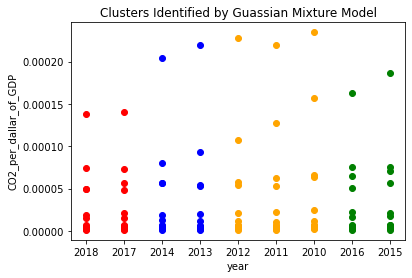

In [86]:
for k in range(0,n_clusters):
    data = X[X["cluster"]==k]
    plt.scatter(data["year"],data["CO2_per_dallar_of_GDP"],c=color[k])
    
    
plt.title("Clusters Identified by Guassian Mixture Model")    
plt.ylabel("CO2_per_dallar_of_GDP")
plt.xlabel("year")
plt.show()

In [176]:

#curve _fit
# fit a second degree polynomial to the economic data
# define the true objective function
def objective(x, a, b, c):
    return a * x + b * x**2 + c

# choose the input and output variables
x, y = norm_data['CO2_production_per_head' ], norm_data['CO2_per_dallar_of_GDP']

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b, c = popt
#The model is as:
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))


y = 0.06509 * x + 76.56151 * x^2 + -0.00001


In [ ]:
#confidence_ranges
h=max(x)-min(x)
x_line = arange(min(x), max(x),h/40)
x_line

In [171]:
# define a sequence of inputs between the smallest and largest known inputs
# forty value s selected
h=max(x)-min(x)
x_line = arange(min(x), max(x),h/40)
#x_line

array([6.48116874e-05, 9.79800171e-05, 1.31148347e-04, 1.64316677e-04,
       1.97485006e-04, 2.30653336e-04, 2.63821666e-04, 2.96989995e-04,
       3.30158325e-04, 3.63326655e-04, 3.96494984e-04, 4.29663314e-04,
       4.62831644e-04, 4.95999974e-04, 5.29168303e-04, 5.62336633e-04,
       5.95504963e-04, 6.28673292e-04, 6.61841622e-04, 6.95009952e-04,
       7.28178281e-04, 7.61346611e-04, 7.94514941e-04, 8.27683270e-04,
       8.60851600e-04, 8.94019930e-04, 9.27188260e-04, 9.60356589e-04,
       9.93524919e-04, 1.02669325e-03, 1.05986158e-03, 1.09302991e-03,
       1.12619824e-03, 1.15936657e-03, 1.19253490e-03, 1.22570323e-03,
       1.25887156e-03, 1.29203989e-03, 1.32520822e-03, 1.35837655e-03])

In [172]:
# calculate the output for the range
y_line = objective(x_line, a, b, c)
#y_line

array([-6.01638669e-06, -3.44400575e-06, -7.03168342e-07,  2.20612553e-06,
        5.28387587e-06,  8.53008268e-06,  1.19447460e-05,  1.55278657e-05,
        1.92794419e-05,  2.31994746e-05,  2.72879637e-05,  3.15449093e-05,
        3.59703114e-05,  4.05641700e-05,  4.53264850e-05,  5.02572565e-05,
        5.53564844e-05,  6.06241688e-05,  6.60603097e-05,  7.16649070e-05,
        7.74379609e-05,  8.33794711e-05,  8.94894379e-05,  9.57678611e-05,
        1.02214741e-04,  1.08830077e-04,  1.15613870e-04,  1.22566119e-04,
        1.29686824e-04,  1.36975986e-04,  1.44433605e-04,  1.52059680e-04,
        1.59854211e-04,  1.67817199e-04,  1.75948643e-04,  1.84248544e-04,
        1.92716901e-04,  2.01353715e-04,  2.10158985e-04,  2.19132712e-04])

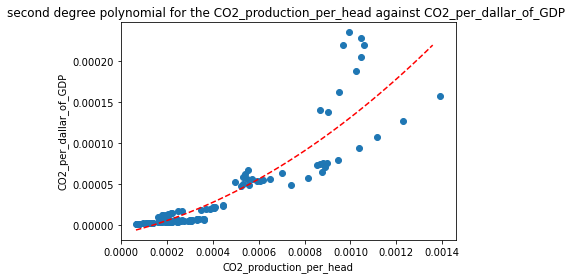

In [175]:
# create a line plot for the mapping function
# plot input vs output
plt.scatter(x, y)
plt.plot(x_line, y_line, '--', color='red')
plt.title("second degree polynomial for the CO2_production_per_head against CO2_per_dallar_of_GDP ")    
plt.ylabel("CO2_per_dallar_of_GDP")
plt.xlabel("CO2_production_per_head")

plt.show()